In [1]:
%matplotlib inline

from keras import backend as K
from keras.callbacks import TensorBoard
from keras import objectives, regularizers
from keras.datasets import mnist
from keras.layers import Input, Dense, GaussianNoise, Lambda, Activation
from keras.models import Model, Sequential

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns
sns.set_style("dark")

from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy import io

from keras.datasets import mnist
from keras.activations import softmax

from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

from keras.regularizers import Regularizer

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [4]:
# information dimension regularization penalty
def id_reg(act):
    lam = 1e-3
    p = softmax(act, axis=-1)
    H = -K.sum(p * K.log(p + 1e-9))
    return lam * H

In [ ]:
# Model 1
batch_size = 400
latent_dim = 2
epochs = 3
lr = 0.001

input_dim = x_train.shape[1]

input_layer = Input(shape=(input_dim,))
c = BatchNormalization(scale=False)(input_layer)
c = Dense(1024, activation='relu',activity_regularizer=id_reg)(c)
e = BatchNormalization(scale=False)(c)
e = GaussianNoise(0.5)(e)
e = BatchNormalization(scale=False)(e)
e = Dense(512, activation='relu')(e)
e = BatchNormalization(scale=False)(e)
e = Dense(256, activation='relu')(e)
e = BatchNormalization(scale=False)(e)
e = Dense(latent_dim, activation='linear')(e)
e = BatchNormalization(scale=False)(e)
d = Dense(256, activation='relu')(e)
d = BatchNormalization(scale=False)(d)
d = Dense(512, activation='relu')(d)
d = BatchNormalization(scale=False)(d)
d = Dense(1024, activation='relu')(d)
d = BatchNormalization(scale=False)(d)
d = Dense(input_dim, activation='sigmoid')(d)

autoencoder = Model(inputs=input_layer, outputs=d)
encoder = Model(inputs=input_layer, outputs=e)
cluster = Model(inputs=input_layer, outputs=c)

In [167]:
# Model 2
batch_size = 400
latent_dim = 2
epochs = 20
lr = 0.001

def id_reg1(act):
    lam = 1e-6
    p = ((act + 1) / 2) / 1024
    H = -K.sum(p * K.log(p + 1e-9))
    return lam * H

def id_reg2(act):
    lam = 1e-5
    p = ((act + 1) / 2) / 1024
    H = -K.sum(p * K.log(p + 1e-9))
    return lam * H

def id_reg3(act):
    lam = 1e-4
    p = ((act + 1) / 2) / 1024
    H = -K.sum(p * K.log(p + 1e-9))
    return lam * H

input_dim = x_train.shape[1]

input_layer = Input(shape=(input_dim,))
e = BatchNormalization(scale=False)(input_layer)
e = Dense(1024, activation='tanh',activity_regularizer=id_reg1)(e)
e = BatchNormalization(scale=False)(e)
e = Dense(1024, activation='tanh',activity_regularizer=id_reg2)(e)
e = BatchNormalization(scale=False)(e)
e = Dense(1024, activation='tanh',activity_regularizer=id_reg3)(e)
e = BatchNormalization(scale=False)(e)
e = Dense(latent_dim, activation='linear')(e)
d = BatchNormalization(scale=False)(e)
d = Dense(1024, activation='tanh')(d)
d = BatchNormalization(scale=False)(d)
d = Dense(1024, activation='tanh')(d)
d = BatchNormalization(scale=False)(d)
d = Dense(1024, activation='tanh')(d)
d = BatchNormalization(scale=False)(d)
d = Dense(input_dim, activation='sigmoid')(d)

autoencoder = Model(inputs=input_layer, outputs=d)
encoder = Model(inputs=input_layer, outputs=e)

In [223]:
# Model 3
batch_size = 400
latent_dim = 2
epochs = 10
lr = 0.001

def id_reg(act):
    lam = 1e-3
    p = ((act + 1) / 2) / 1024
    H = -K.sum(p * K.log(p + 1e-9))
    return lam * H

def id_reg1(act):
    lam = 1e-99
    p = ((act + 1) / 2) / 1024
    H = -K.sum(p * K.log(p + 1e-9))
    return lam * H

def id_reg2(act):
    lam = 1e-4
    p = ((act + 1) / 2) / 1024
    H = -K.sum(p * K.log(p + 1e-9))
    return lam * H

def id_reg_l2_1(act):
    lam = 1e-5
    p = act + 1
    p = p / K.sum(p, axis=-1)[:,None]
    #p = K.l2_normalize(p, axis=-1)
    H = -K.sum(p * K.log(p + 1e-9))
    return lam * H

def id_reg_l2_2(act):
    lam = 1e-99
    p = act + 1
    p = p / K.sum(p, axis=-1)[:,None]
    #p = K.l2_normalize(p, axis=-1)
    H = -K.sum(p * K.log(p + 1e-9))
    return lam * H

input_dim = x_train.shape[1]

input_layer = Input(shape=(input_dim,))
e = BatchNormalization(scale=False)(input_layer)
e = Dense(1024, activation='tanh',activity_regularizer=id_reg1)(e)
e = BatchNormalization(scale=False)(e)
e = Dense(1024, activation='tanh',activity_regularizer=id_reg2)(e)
e = BatchNormalization(scale=False)(e)
e = Dense(latent_dim, activation='linear')(e)
d = BatchNormalization(scale=False)(e)
d = Dense(1024, activation='tanh')(d)
d = BatchNormalization(scale=False)(d)
d = Dense(1024, activation='tanh')(d)
d = BatchNormalization(scale=False)(d)
d = Dense(input_dim, activation='sigmoid')(d)

autoencoder = Model(inputs=input_layer, outputs=d)
encoder = Model(inputs=input_layer, outputs=e)

In [224]:
# Train
adam = Adam(lr=lr)
autoencoder.compile(optimizer=adam, loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                verbose=1,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 38s - loss: 0.4554 - val_loss: 0.2933
Epoch 2/10
60000/60000 [==============================] - 32s - loss: 0.2119 - val_loss: 0.3397
Epoch 3/10
60000/60000 [==============================] - 33s - loss: 0.1959 - val_loss: 0.3036
Epoch 4/10
60000/60000 [==============================] - 34s - loss: 0.1884 - val_loss: 0.2460
Epoch 5/10
60000/60000 [==============================] - 34s - loss: 0.1845 - val_loss: 0.2154
Epoch 6/10
60000/60000 [==============================] - 33s - loss: 0.1823 - val_loss: 0.2063
Epoch 7/10
60000/60000 [==============================] - 32s - loss: 0.1801 - val_loss: 0.1919
Epoch 8/10
60000/60000 [==============================] - 33s - loss: 0.1798 - val_loss: 0.1846
Epoch 9/10
60000/60000 [==============================] - 33s - loss: 0.1777 - val_loss: 0.1836
Epoch 10/10
60000/60000 [==============================] - 33s - loss: 0.1770 - val_lo

In [225]:
x_train_encoded = encoder.predict(x_train, batch_size=batch_size)

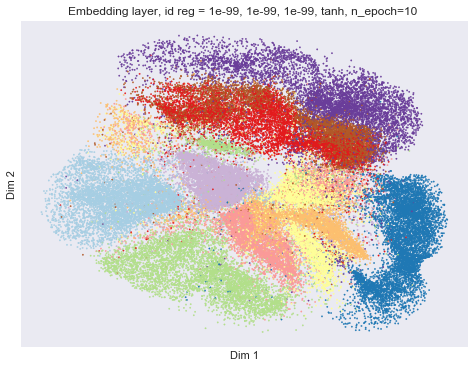

In [79]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg = 1e-99, 1e-99, 1e-99, tanh, n_epoch=10 ")
plt.show()

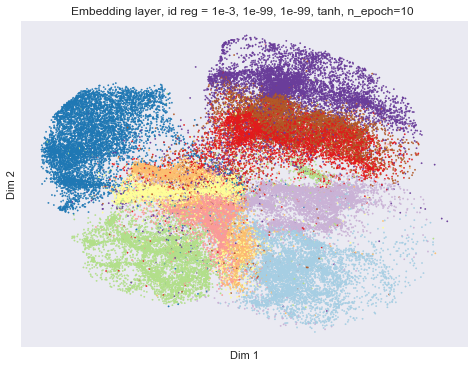

In [83]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg = 1e-3, 1e-99, 1e-99, tanh, n_epoch=10 ")
plt.show()

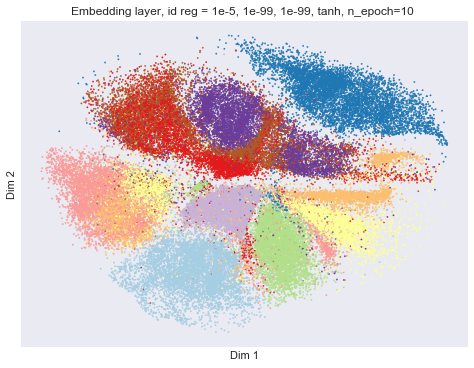

In [87]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg = 1e-5, 1e-99, 1e-99, tanh, n_epoch=10 ")
plt.show()

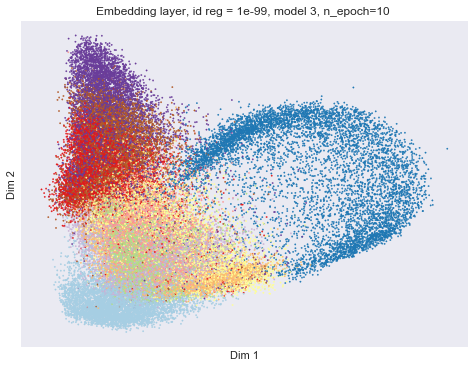

In [99]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg = 1e-99, model 3, n_epoch=10 ")
plt.show()

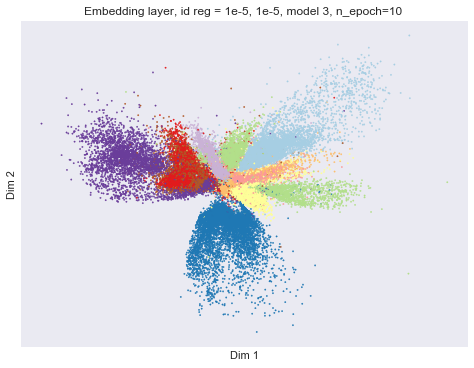

In [108]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg = 1e-5, 1e-5, model 3, n_epoch=10 ")
plt.show()

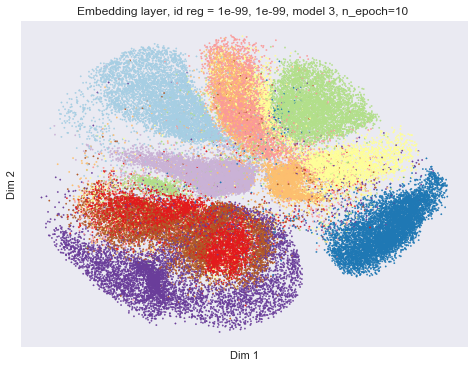

In [112]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg = 1e-99, 1e-99, model 3, n_epoch=10 ")
plt.show()

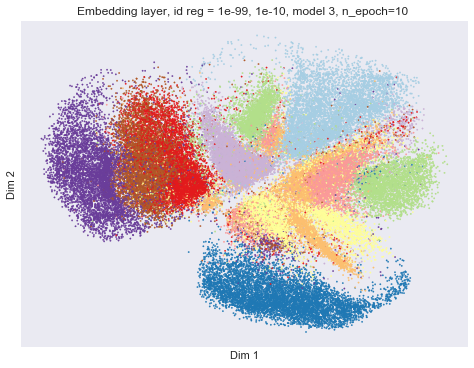

In [116]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg = 1e-99, 1e-10, model 3, n_epoch=10 ")
plt.show()

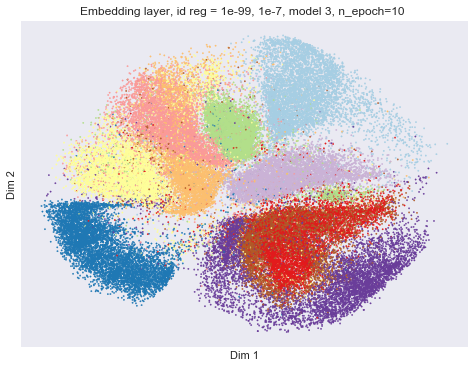

In [120]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg = 1e-99, 1e-7, model 3, n_epoch=10 ")
plt.show()

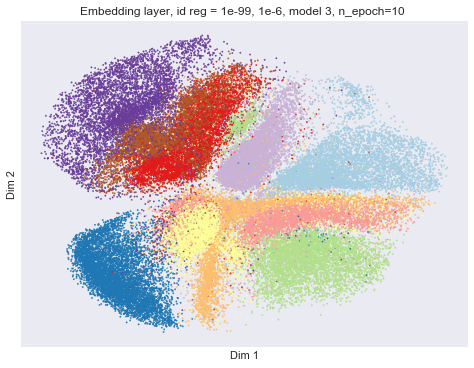

In [124]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg = 1e-99, 1e-6, model 3, n_epoch=10 ")
plt.show()

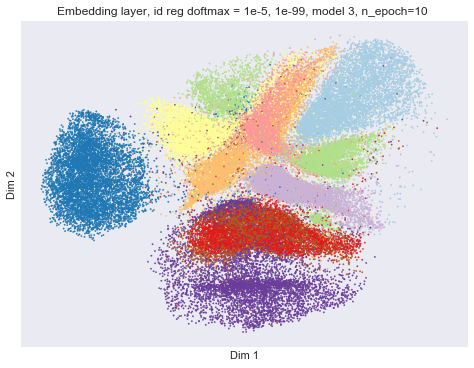

In [128]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg doftmax = 1e-5, 1e-99, model 3, n_epoch=10 ")
plt.show()

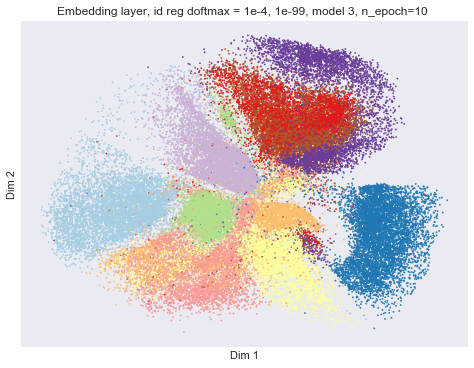

In [132]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg doftmax = 1e-4, 1e-99, model 3, n_epoch=10 ")
plt.show()

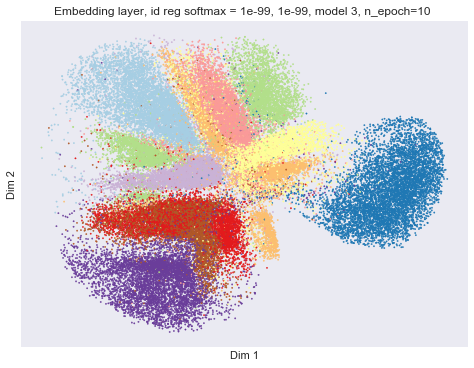

In [137]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg softmax = 1e-99, 1e-99, model 3, n_epoch=10 ")
plt.show()

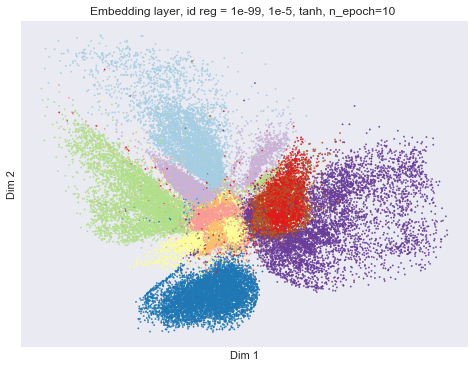

In [149]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg = 1e-99, 1e-5, tanh, n_epoch=10 ")
plt.show()

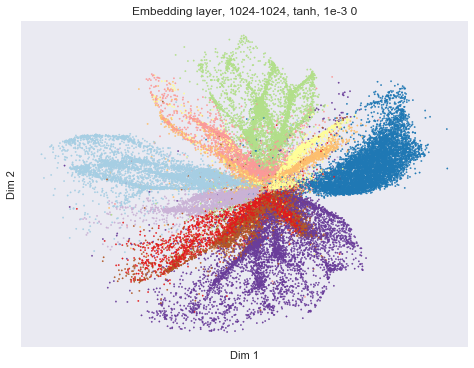

In [183]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, 1024-1024, tanh, 1e-3 0")
plt.show()

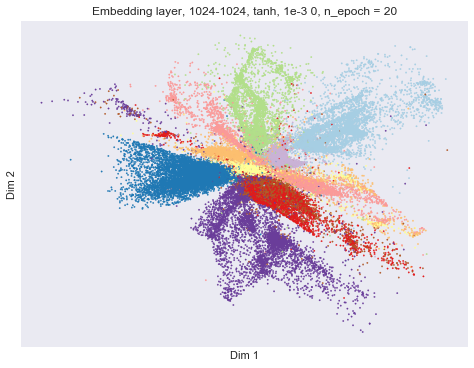

In [187]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, 1024-1024, tanh, 1e-3 0, n_epoch = 20")
plt.show()

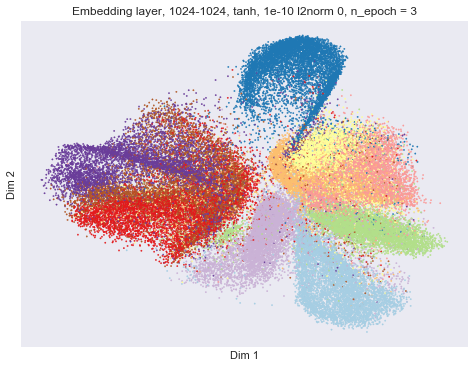

In [206]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, 1024-1024, tanh, 1e-10 l2norm 0, n_epoch = 3")
plt.show()

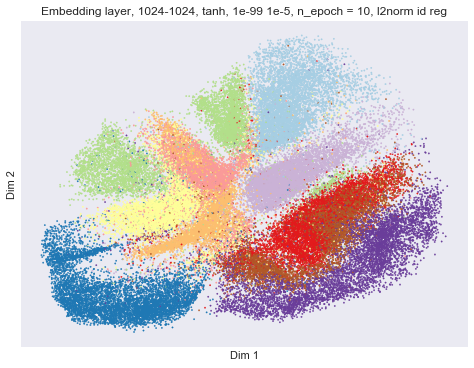

In [210]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, 1024-1024, tanh, 1e-99 1e-5, n_epoch = 10, l2norm id reg")
plt.show()

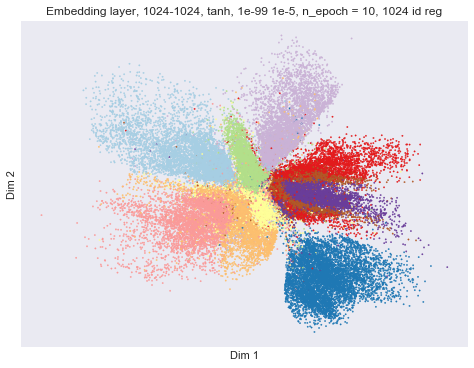

In [222]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, 1024-1024, tanh, 1e-99 1e-5, n_epoch = 10, 1024 id reg")
plt.show()

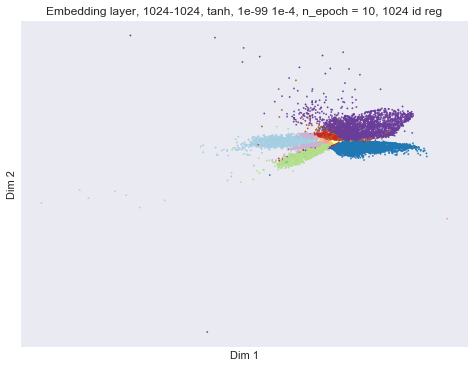

In [226]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, 1024-1024, tanh, 1e-99 1e-4, n_epoch = 10, 1024 id reg")
plt.show()